In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [3]:
#Reading data
digitalwallet = pd.read_csv("digital_wallet_transactions.csv")
digitalwallet.head()

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban


In [4]:
# Drop the 'transaction_id' column because I believe it may cause unnessecary computing

digitalwallet = digitalwallet.drop(columns=['transaction_id'])
print(digitalwallet.columns)



Index(['idx', 'user_id', 'transaction_date', 'product_category',
       'product_name', 'merchant_name', 'product_amount', 'transaction_fee',
       'cashback', 'loyalty_points', 'payment_method', 'transaction_status',
       'merchant_id', 'device_type', 'location'],
      dtype='object')


In [5]:
#Showing only the products that was bought to see trends
category_df= digitalwallet[["product_category","product_amount","loyalty_points"]]
# Sort the dataframe in descending order based on a specific column.
# Replace 'product_amount' with the actual column you want to sort by.
category_df.sort_values(by=['product_amount'], ascending=False, inplace=True)
category_df.head()

<ipython-input-5-3c90fecf7642>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df.sort_values(by=['product_amount'], ascending=False, inplace=True)


,product_category,product_amount,loyalty_points
4972,Flight Booking,9996.95,413
1249,Gift Card,9994.83,424
4150,Flight Booking,9993.54,792
4572,Internet Bill,9992.47,124
1204,Bus Ticket,9992.23,772


In [6]:
#Values in descending order
category_df.sort_values(by=['product_amount'], ascending=True, inplace=True)
category_df.head()

<ipython-input-6-a8a06b818624>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df.sort_values(by=['product_amount'], ascending=True, inplace=True)


,product_category,product_amount,loyalty_points
404,Bus Ticket,10.09,307
4519,Loan Repayment,11.75,268
88,Bus Ticket,12.86,271
4023,Water Bill,13.33,750
796,Mobile Recharge,14.23,809


In [7]:
# Group by product category and sum the product amount
category_counts = digitalwallet.groupby('product_category')['product_amount'].sum()

# Create a DataFrame
product_list_df = pd.DataFrame({'product_category': category_counts.index, 'product_amount': category_counts.values})

print(product_list_df)


     product_category  product_amount
0          Bus Ticket      1115711.58
1       Education Fee      1349321.77
2    Electricity Bill      1245972.74
3      Flight Booking      1124283.05
4       Food Delivery      1317106.21
5      Gaming Credits      1136665.44
6            Gas Bill      1361519.80
7           Gift Card      1022796.45
8    Grocery Shopping      1134972.71
9       Hotel Booking      1319603.90
10  Insurance Premium      1032608.99
11      Internet Bill      1247178.07
12     Loan Repayment      1210681.76
13    Mobile Recharge      1196334.68
14       Movie Ticket      1337399.89
15    Online Shopping      1207396.13
16       Rent Payment      1258263.69
17  Streaming Service      1462461.66
18          Taxi Fare      1306566.24
19         Water Bill      1400668.85


# Making a pie chart to show what was spent on the most
## I noticed there are 3 categories. Travel, Shopping, and Bills. This data set is random but lets say this data was from one year of users on this digital purchasing app.

In [8]:
#Reading data from comparisons
travel_df= pd.read_csv("travel - travel.csv")
travel_df = travel_df.iloc[1:]
print(travel_df)

  Product Category   Product Amount
1    flight booking      1124283.05
2     hotel booking      1319603.90
3         Taxi Fare      1306566.24
4   Mobile Recharge      1196334.68
5          Gas Bill      1361519.80


In [9]:
#Reading data from comparisons
shopping_df= pd.read_csv("shopping - Sheet1.csv")
shopping_df = shopping_df.iloc[1:]
print(shopping_df)

     Product Category   Product Amount
1       Food Delivery       1317106.21
2       Gaming Credits      1136665.44
3            Gift Card      1022796.45
4    Grocery Shopping       1134972.71
5         Movie Ticket      1337399.89
6      Online Shopping      1207396.13
7  Streaming Services       1462461.66


In [11]:
#Reading data from comparisons
bill_df= pd.read_csv("Bills - Sheet1.csv")
bill_df = bill_df.iloc[1:]
print(bill_df)

   Product Category   Product Amount
1     Loan Repayment      1210681.76
2      Internet Bill      1247178.07
3       Rent Payment      1258263.69
4         Water Bill      1400668.85
5  Insurance Premium      1032608.99


In [12]:
#  sum up the 'product_amount' column
Bills_total_product_amount = bill_df['Product Amount'].sum()

Shopping_total_product_amount = shopping_df['Product Amount'].sum()

travel_total_product_amount = travel_df['Product Amount'].sum()

print(f"The total amount people spend on bills is: {Bills_total_product_amount}")
print(f"The total amount people spend on shopping is: {Shopping_total_product_amount}")
print(f"The total amount people spend on travel is: {travel_total_product_amount}")


The total amount people spend on bills is: 6149401.36
The total amount people spend on shopping is: 8618798.489999998
The total amount people spend on travel is: 6308307.67


In [13]:
# create a dataframe

data = {'Category': ['Bills', 'Shopping', 'Travel'],
        'Total Amount': [Bills_total_product_amount, Shopping_total_product_amount, travel_total_product_amount]}

What_was_spent_df = pd.DataFrame(data)
print(What_was_spent_df)


   Category  Total Amount
0     Bills    6149401.36
1  Shopping    8618798.49
2    Travel    6308307.67


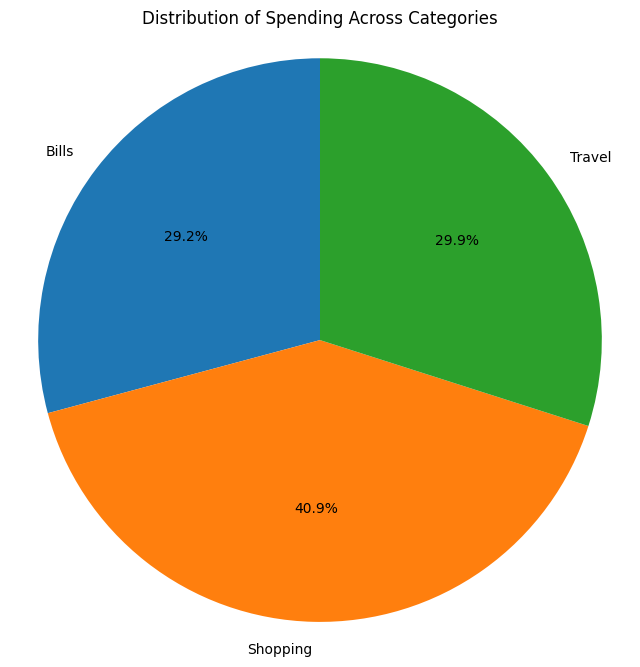

In [14]:
# prompt: create a pie chart

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(What_was_spent_df['Total Amount'], labels=What_was_spent_df['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Spending Across Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
